In [1333]:
#@title Data retrieval
import os, requests
import matplotlib.pylab as plt
from matplotlib.pyplot import figure


fname = ['steinmetz_st.npz']
#fname.append('steinmetz_wav.npz')
#fname.append('steinmetz_lfp.npz')

import numpy as np

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
#dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
#dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']

In [1334]:
import numpy as np

fname1 =['steinmetz_part0.npz', 'steinmetz_part1.npz', 'steinmetz_part2.npz']

alldat = np.array([])
for j in range(len(fname1)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

`dat_LFP`, `dat_WAV`, `dat_ST` contain 39 sessions from 10 mice, data from Steinmetz et al, 2019, supplemental to the main data provided for NMA. Time bins for all measurements are 10ms, starting 500ms before stimulus onset (same as the main data). The followin fields are available across the three supplemental files. 

* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['ss']`: neurons by trials. Exact spikes times for each neuron and each trial, reference to the stimulus onset. A (neuron,trial) entry can be an empty list if that neuron did not fire at all on that trial. 
* `dat['%X%_passive']`: same as above for `X` = {`lfp`, `ss`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




In [1335]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

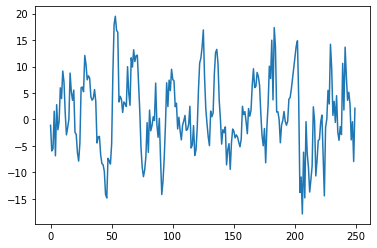

In [1820]:
import numpy.fft as fft
a = dat_LFP[1]['lfp'][1][1]
plt.plot(a)

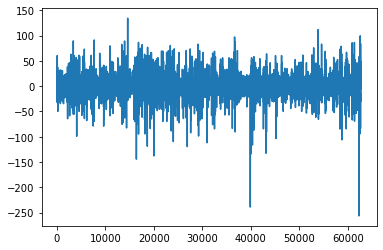

In [1821]:
b = dat_LFP[1]['lfp'][1].flatten()

plt.plot(b)

In [1822]:
dat_LFP[9]['lfp'][1].shape

(447, 250)

In [1823]:
idx = 0

import pandas as pd

areas = dat_LFP[9]['brain_area_lfp']

trial1 = dat_LFP[9]['lfp'][:, idx, :].T
trial1_v = pd.DataFrame(trial1,columns=areas)

In [1824]:
a = trial1_v.corr()
a[a<0] = 0
a.replace(1, 0)

,MB,POST,SCm,SCsg,VISp,CA1,DG,MRN,POL,VISl,GPe,VISrl
MB,0.000000,0.639196,0.894383,0.630722,0.525229,0.362198,0.719680,0.808314,0.757944,0.141049,0.246884,0.103863
POST,0.639196,0.000000,0.690372,0.708639,0.821093,0.600441,0.423473,0.389492,0.327966,0.299600,0.031845,0.274556
SCm,0.894383,0.690372,0.000000,0.792507,0.578543,0.390330,0.660178,0.628826,0.616474,0.122095,0.081806,0.092228
SCsg,0.630722,0.708639,0.792507,0.000000,0.596696,0.436149,0.467107,0.359808,0.354249,0.157639,0.000000,0.185288
VISp,0.525229,0.821093,0.578543,0.596696,0.000000,0.469374,0.294475,0.281808,0.206493,0.319454,0.000000,0.315063
CA1,0.362198,0.600441,0.390330,0.436149,0.469374,0.000000,0.221715,0.274609,0.230906,0.336113,0.113984,0.219960
DG,0.719680,0.423473,0.660178,0.467107,0.294475,0.221715,0.000000,0.798816,0.880735,0.000000,0.324659,0.000000
MRN,0.808314,0.389492,0.628826,0.359808,0.281808,0.274609,0.798816,0.000000,0.928207,0.118104,0.548027,0.104182
POL,0.757944,0.327966,0.616474,0.354249,0.206493,0.230906,0.880735,0.928207,0.000000,0.000000,0.464229,0.000000
VISl,0.141049,0.299600,0.122095,0.157639,0.319454,0.336113,0.000000,0.118104,0.000000,0.000000,0.089382,0.517498


<AxesSubplot:>

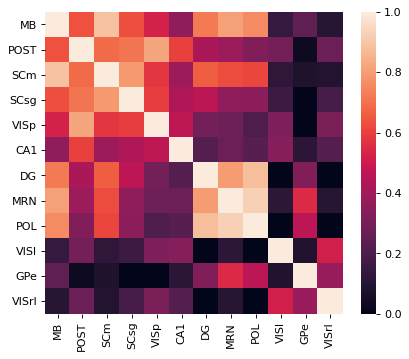

In [1825]:
import seaborn
import networkx as nx
from networkx import from_numpy_array, draw_networkx,eigenvector_centrality, average_shortest_path_length, harmonic_centrality, global_efficiency

from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)


seaborn.heatmap(a)

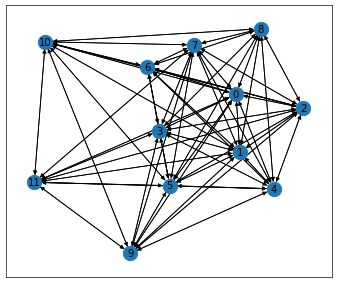

In [1829]:
figure(figsize=(7, 6), dpi=60)
draw_networkx(from_numpy_array((np.array(a)), parallel_edges=False, create_using=nx.DiGraph))

In [1451]:
li = list(harmonic_centrality(from_numpy_array((np.array(a)), parallel_edges=False, create_using=nx.Graph)).items())
li

[(0, 11.0),
 (1, 11.0),
 (2, 11.0),
 (3, 10.5),
 (4, 10.5),
 (5, 11.0),
 (6, 10.0),
 (7, 11.0),
 (8, 10.0),
 (9, 10.0),
 (10, 10.0),
 (11, 10.0)]

In [ ]:
#################### 从这里才开始跑所有的数据 ################

In [1453]:
L = []
for idx in range (447):
    each_trial = dat_LFP[9]['lfp'][:, idx, :100].T
    each_trial = pd.DataFrame(each_trial,columns=areas)
    each_trial = each_trial.corr()
    each_trial[each_trial<0] = 0
    each_trial.replace(1, 0)
    L.append(each_trial)

In [1675]:
all_matrix = np.array(L)
list_ei = []
# iterate graph analysis through each connectivity matrix and stores the result in a list

r = all_matrix.shape[0]
for idx in range(r):
    each_m = all_matrix[idx]
    each_m[each_m < np.mean(all_matrix[idx])] = 0
    each_m[each_m > 0] = 1
    list_ei.append(list(harmonic_centrality(from_numpy_array(all_matrix[idx], parallel_edges=False, create_using=nx.Graph)).values()))

In [1854]:
### Add FC and stimulus together ####

stack = np.hstack((np.array(list_ei), alldat[9]['response_time']))

In [1855]:
############## 开始跑pytorch ################

In [1856]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
X = torch.tensor(stack, dtype = torch.float)
Y = alldat[9]['feedback_type']
#Y = torch.tensor(Y, dtype = torch.long)
Y[Y== -1] = 0
#Y = torch.tensor(alldat[7]['feedback_type'], dtype = torch.long)
Y = torch.tensor(Y, dtype = torch.long)
X

tensor([[8.0000, 8.5000, 8.5000,  ..., 4.5000, 1.0000, 0.8504],
        [8.5833, 8.3333, 8.5833,  ..., 5.6167, 3.8167, 2.5034],
        [7.0000, 7.5000, 7.5000,  ..., 4.8333, 0.0000, 1.0670],
        ...,
        [7.5000, 8.0000, 8.0000,  ..., 4.6667, 0.0000, 2.5383],
        [8.0833, 7.8333, 7.5833,  ..., 5.7833, 3.4833, 2.0048],
        [7.1667, 5.9167, 7.1667,  ..., 6.1667, 5.1667, 2.5559]])

In [1857]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [1858]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        if (train):
            self.x = x_train
            self.y = y_train
            self.len = self.x.shape[0]
            
        else: 
            self.x = x_test
            selfy = y_test
        
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [1859]:
train_set=Data()
test_set = Data(train = False)
train_loader = DataLoader(dataset=train_set, batch_size = 168)
test_loader = DataLoader(dataset=test_set, batch_size = 2)

In [1860]:
# Create the neural network

class Net(nn.Module):
    
    def weights_init(m):
        if isinstance(m, torch.relu):
            torch.nn.init.kaiming_uniform_(m.weight.data)
            torch.nn.init.kaiming_uniform_(m.bias.data)
        elif isinstance(m, F.softmax):
            torch.nn.init.xavier_normal_(m.weight.data)
            torch.nn.init.xavier_normal_(m.bias.data)
        
        
    # Constructor
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = F.softmax(self.linear4(x))
        return x

In [1861]:
# Define the function for training the model

LOSS = []  
#min_loss = 0.3

def train(data_set, model, criterion, train_loader, optimizer, epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            yhat = model(x.float())
            loss = criterion(yhat, y)
            #loss_val = criterion(model(val_dataset.x), val_dataset.y).item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
            #if loss < min_loss:
             #   break
            #VAL.append(val.item)

In [1862]:
D_in = 13
H1 = 120
H2 = 140
H3 = 120
D_out = 3


model = Net(D_in, H1, H2, H3, D_out)
#model.apply(initialize_weights)
learning_rate = 0.00004
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

<ipython-input-1860-1f0a6e7f01a0>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.linear4(x))


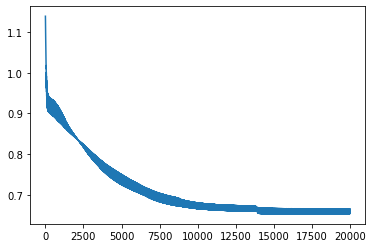

In [1863]:
train(train_set, model, criterion, train_loader, optimizer, epochs= 10000)
plt.plot(LOSS)

In [1864]:
"""
from sklearn.metrics import accuracy_score

pred = model(x_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print('Test Accuracy:', correct)

pred_2 = model(x_train)
_,predict_classes2 = torch.max(pred_2,1)

correct2 = accuracy_score(y_train, predict_classes2)
print('Train Accuracy:', correct2)
"""

"\nfrom sklearn.metrics import accuracy_score\n\npred = model(x_test)\n_, predict_classes = torch.max(pred,1)\n\ncorrect = accuracy_score(y_test, predict_classes)\nprint('Test Accuracy:', correct)\n\npred_2 = model(x_train)\n_,predict_classes2 = torch.max(pred_2,1)\n\ncorrect2 = accuracy_score(y_train, predict_classes2)\nprint('Train Accuracy:', correct2)\n"

In [1869]:
######### save model ###########
torch.save(model.state_dict(), 'best_fc_st_model')

In [1867]:


x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.25, random_state=11)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.25, random_state=23)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.25, random_state=33)
x_train4, x_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=0.25, random_state=44)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X, Y, test_size=0.25, random_state=57)

In [1868]:
from sklearn.metrics import accuracy_score


pred1 = model(x_test1)
_, predict_classes1 = torch.max(pred1,1)

correct1 = accuracy_score(y_test1, predict_classes1)
print('Test Accuracy1:', correct1)
############
pred2 = model(x_test2)
_, predict_classes2 = torch.max(pred2,1)

correct2 = accuracy_score(y_test2, predict_classes2)
print('Test Accuracy2:', correct2)
###########
pred3 = model(x_test3)
_, predict_classes3 = torch.max(pred3,1)

correct3 = accuracy_score(y_test3, predict_classes3)
print('Test Accuracy3:', correct3)
############
pred4 = model(x_test4)
_, predict_classes4 = torch.max(pred4,1)

correct4 = accuracy_score(y_test4, predict_classes4)
print('Test Accuracy4:', correct4)

############
pred5 = model(x_test5)
_, predict_classes5 = torch.max(pred5,1)

correct5 = accuracy_score(y_test5, predict_classes5)
print('Test Accuracy5:', correct5)

Test Accuracy1: 0.8125
Test Accuracy2: 0.8214285714285714
Test Accuracy3: 0.8482142857142857
Test Accuracy4: 0.7857142857142857
Test Accuracy5: 0.8303571428571429


<ipython-input-1860-1f0a6e7f01a0>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.linear4(x))


## The below are some other unfinished modelling using sklearn logistic regression

In [ ]:
######### sklearn logistics regression #############

In [1763]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [1767]:
X1 = np.array(list_ei)         #### logistic on centrality
Y1 = Y
Y1[Y1 == -1] = 0


logi_model = LogisticRegressionCV()
logi_model.fit(X1, Y1)
a = cross_val_score(logi_model, X1, Y1)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [1755]:
########################

In [1756]:
list_ge = []         ### logistic on global efficiency
for idx in range(r): 
    list_ge.append(global_efficiency(from_numpy_array(all_matrix[idx], parallel_edges=False, create_using=nx.Graph)))

In [1757]:
Xg = np.array(list_ge).reshape(-1,1)
Y2 = alldat[9]['feedback_type']
Y2[Y2 == -1] = 0

In [1758]:
logi_model2 = LogisticRegressionCV()
logi_model2.fit(Xg, Y2)
logi_model2.score(Xg,Y2)

0.6196868008948546

In [1759]:
########################

In [1810]:
reaction_time = alldat[9]['response_time']       #### response time
logi_model3 = LogisticRegressionCV(cv=5)
logi_model3.fit(reaction_time, Y2)
logi_model3.score(reaction_time, Y2)

0.6487695749440716

In [1761]:
int_and_ext = np.hstack((Xg, reaction_time))
log_model4 = LogisticRegressionCV(cv=5)
log_model4.fit(int_and_ext, c_or_w)

In [1371]:
######################## logistic on stimulus    ##################

In [1811]:
Xc = alldat[9]['contrast_right'] - alldat[9]['contrast_left']
Xc= Xc.reshape(-1,1)
log_model5 = LogisticRegressionCV()
log_model5.fit(Xc, Y2)
cross_val_score(log_model5, Xc, Y2)

array([0.62222222, 0.62222222, 0.61797753, 0.61797753, 0.61797753])